## Run with your first code

In [1]:
from sympy import init_printing; init_printing()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # display all expression in one cell instead of the last one

#### Wave Equation
The tensor coefficient matrix in electromagnetic wave equation 

$$\mathit{k}\times(\mathit{k}\times \tilde{\mathit{E}}) + k_0^2 \mathbf{\kappa}\cdot \tilde{\mathit{E}}=\mathit{0}$$

$$
\left(\begin{bmatrix}
-k_z^2 &  & k_x k_z \\ 
 & -k_x^2-k_z^2 & \\ 
 k_x k_z &  & -k_x^2
\end{bmatrix} + k_0^2
\begin{bmatrix}
\kappa_\perp & -j \kappa_\times & \\ 
j\kappa_\times & \kappa_\perp  & \\ 
 &  & \kappa_\parallel
\end{bmatrix}\right)\cdot 
\begin{bmatrix}
\tilde{E}_x\\ 
\tilde{E}_y\\ 
\tilde{E}_z
\end{bmatrix} = 
\begin{bmatrix}
0\\ 
0\\ 
0
\end{bmatrix}$$

$$
\mathbf{T}\cdot 
\begin{bmatrix}
\tilde{E}_x\\ 
\tilde{E}_y\\ 
\tilde{E}_z
\end{bmatrix} = 
\begin{bmatrix}
0\\ 
0\\ 
0
\end{bmatrix}
$$

You can acquire the `sympy.Array` representation of the above (tensor) matrix coefficients by the `WaveEq` class' coeff_matrix() method. For the relevant variable, you can get them by attribute *e.g.*, `wave_eq.wave.k[1]` means the wave's $k_y$ component of $\vec{k}$ vector.

In [9]:
from sinupy import mediums, waves
from sinupy.waves import EM
plasma = mediums.ColdMagnetizedPlasma()     # to specify a kind of metarial
wave_eq = waves.EM.WaveEq(plasma)           # wave eqution
wave = wave_eq.wave
wave_eq.coeff_matrix()                      # get the k parameter of cross part 
wave_eq

⎡                            2                         2                      
⎢       2       2   κ_\perp⋅ω       ⅈ⋅\kappa_{\times}⋅ω                       
⎢ - k_y_  - k_z_  + ──────────    - ──────────────────── + kₓ ⋅k_y_           
⎢                        2                    2                               
⎢                       c                    c                                
⎢                                                                             
⎢                   2                                          2              
⎢ⅈ⋅\kappa_{\times}⋅ω                      2       2   κ_\perp⋅ω               
⎢──────────────────── + kₓ ⋅k_y_     - kₓ   - k_z_  + ──────────              
⎢          2                                               2                  
⎢         c                                               c                   
⎢                                                                             
⎢                                                   

                                                                              
                                                                              
[k_y_⋅(-Eₓ ⋅k_y_ + E_y_⋅kₓ ) - k_z_⋅(Eₓ ⋅k_z_ - E_z_⋅kₓ )  -kₓ ⋅(-Eₓ ⋅k_y_ + E
                                                                              
                                                                              

                                                                              
                                                                              
_y_⋅kₓ ) + k_z_⋅(-E_y_⋅k_z_ + E_z_⋅k_y_)  kₓ ⋅(Eₓ ⋅k_z_ - E_z_⋅kₓ ) - k_y_⋅(-E
                                                                              
                                                                              

                         ⎡  2                                            2    
                         ⎢-ω ⋅(Eₓ ⋅κ_\perp - ⅈ⋅E_y_⋅\kappa_{\times})   -ω ⋅(ⅈ⋅
_y_⋅k_z_ + E_z_⋅k_y_)] = ⎢────────────────────────

The function `sinupy.waves.EM.solve_N2(WaveEq)` returns the solutions of $N^2(\omega, \theta)$, which is usually tedious for hand-deduction.

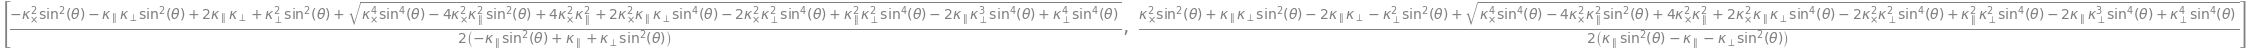

In [3]:
EM.solve_N2(wave_eq)        # solve the eqution